In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('final_df.csv', index_col=['TIME'])
df.head()

,ACTUAL_MW,DAM_MW,2DA_MW,temp
TIME,,,,
2021-03-26 11:00:00+00:00,279.0,289.85,289.20,57.02
2021-03-26 12:00:00+00:00,275.0,288.81,288.26,60.98
2021-03-26 13:00:00+00:00,273.0,289.92,288.59,64.94
2021-03-26 14:00:00+00:00,271.0,293.30,290.04,66.92
2021-03-26 15:00:00+00:00,269.0,294.69,291.57,69.08


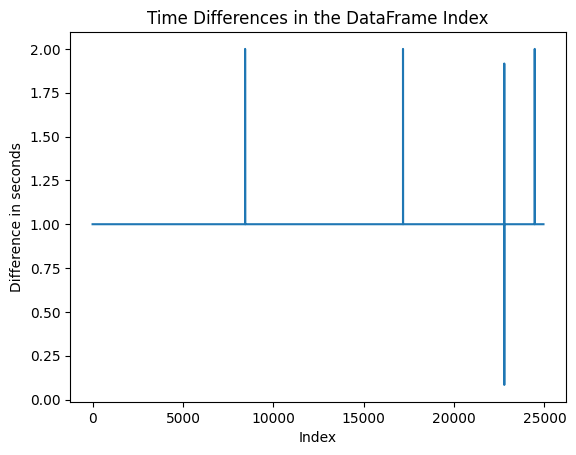

In [63]:
diff = np.diff(df.index)

# Convert the differences to seconds
diff_in_seconds = [d.total_seconds() / 3600 for d in diff]

# Plot the differences
plt.plot(diff_in_seconds)
plt.xlabel('Index')
plt.ylabel('Difference in seconds')
plt.title('Time Differences in the DataFrame Index')
plt.show()

In [5]:
df.index = pd.to_datetime(df.index,)

In [14]:
# finding date range 
df.index.min(), df.index.max()

(Timestamp('2021-03-26 11:00:00+0000', tz='UTC'),
 Timestamp('2024-01-29 23:00:00+0000', tz='UTC'))

In [10]:
# checking duplicates
df.duplicated().sum()

0

In [11]:
# checking missing values
df.isna().sum()

ACTUAL_MW    0
DAM_MW       1
2DA_MW       1
temp         1
dtype: int64

In [18]:
# finding where those 3 values are:
df[df['DAM_MW'].isna()]

,ACTUAL_MW,DAM_MW,2DA_MW,temp
TIME,,,,
2023-10-31 13:55:00+00:00,309.0,NaN,NaN,NaN


In [61]:
# finding idx of missing values
missing_idx = df[df['DAM_MW'].isna()].index

# impute the missing values as the average of the value infront of it and behind it. Not particularly significant for one value in a large time series
idx_before = missing_idx + pd.Timedelta('5m')
idx_after = missing_idx - pd.Timedelta('55m')
df.loc[idx_after]

KeyError: "None of [DatetimeIndex(['2023-10-31 13:00:00+00:00'], dtype='datetime64[ns, UTC]', name='TIME', freq=None)] are in the [index]"

In [52]:
import pandas as pd

# Sample DataFrame (replace with your actual DataFrame)
# df = pd.read_csv('your_data.csv')  # Load your DataFrame as needed

# Assume missing_idx is already defined and contains the indices of missing values
# Example: missing_idx = df[df['DAM_MW'].isna()].index

# Step 1: Check Original Missing Index Values
print("Original Missing Index Values:\n", missing_idx)
print("Rows with Missing Values:\n", df.loc[missing_idx])

# Step 2: Verify Index Before and After Calculation
idx_before = missing_idx + pd.Timedelta('5m')
idx_after = missing_idx - pd.Timedelta('5m')

print("Calculated Index Before (+5m):\n", idx_before)
print("Calculated Index After (-5m):\n", idx_after)

# Step 3: Check for Presence in Index
idx_after_in_index = idx_after.isin(df.index)
print("Index After in DataFrame Index:\n", idx_after_in_index)

# Filter valid indices
valid_idx_before = idx_before[idx_before.isin(df.index)]
valid_idx_after = idx_after[idx_after_in_index]

# Locate the valid rows in the DataFrame
rows_before = df.loc[valid_idx_before]
rows_after = df.loc[valid_idx_after]

# Display the results
print("Rows Before:\n", rows_before)
print("Rows After:\n", rows_after)


Original Missing Index Values:
 DatetimeIndex(['2023-10-31 13:55:00+00:00'], dtype='datetime64[ns, UTC]', name='TIME', freq=None)
Rows with Missing Values:
                            ACTUAL_MW  DAM_MW  2DA_MW  temp
TIME                                                      
2023-10-31 13:55:00+00:00      309.0     NaN     NaN   NaN
Calculated Index Before (+5m):
 DatetimeIndex(['2023-10-31 14:00:00+00:00'], dtype='datetime64[ns, UTC]', name='TIME', freq=None)
Calculated Index After (-5m):
 DatetimeIndex(['2023-10-31 13:50:00+00:00'], dtype='datetime64[ns, UTC]', name='TIME', freq=None)
Index After in DataFrame Index:
 [False]
Rows Before:
                            ACTUAL_MW  DAM_MW  2DA_MW   temp
TIME                                                       
2023-10-31 14:00:00+00:00      309.0  317.32  317.68  73.94
Rows After:
 Empty DataFrame
Columns: [ACTUAL_MW, DAM_MW, 2DA_MW, temp]
Index: []


In [40]:
df.loc[missing_idx - pd.Timedelta('5m')]

KeyError: "None of [DatetimeIndex(['2023-10-31 13:50:00+00:00'], dtype='datetime64[ns, UTC]', name='TIME', freq=None)] are in the [index]"